In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from astropy.io import fits
import os

In [3]:
bias_dir = "/Users/vitorclara/Documents/Técnico/LA/bias/" # Folder with all the bias
bias_files = ["bias_cooled__2025-09-16_18-34-24_0004.fits","bias_cooled__2025-09-16_18-34-27_0005.fits","bias_cooled__2025-09-16_18-34-29_0006.fits",
              "bias_cooled__2025-09-16_18-34-32_0007.fits","bias_cooled__2025-09-16_18-34-35_0008.fits", "bias_cooled__2025-09-16_18-34-37_0009.fits", "bias_cooled__2025-09-16_18-34-40_0010.fits", "bias_cooled__2025-09-16_18-34-42_0011.fits", "bias_cooled__2025-09-16_18-34-45_0012.fits", "bias_cooled__2025-09-16_18-34-47_0013.fits"]

# Load the Bias Images
bias_images = []
for file in bias_files:
    image = fits.getdata(bias_dir+file)
    bias_images.append(image)

# Stack the Bias images using median
master_bias = np.median(np.asarray(bias_images), axis=0)

In [4]:
savename=bias_dir+"master_bias.fits"
fits.writeto(savename, master_bias, overwrite=True)

In [5]:
flat_blue_dir = "./flats_blue//"

# Pega automaticamente em todos os ficheiros que tenham "_Blue_" no nome
flat_files = [f for f in os.listdir(flat_blue_dir) if "_Blue_" in f]

print("Ficheiros encontrados:", flat_files)

# Carregar e normalizar
flat_images = []
for file in flat_files:
    image = fits.getdata(os.path.join(flat_blue_dir, file))
    flat_images.append((image - master_bias) / np.median(image - master_bias))

# Criar master flat
master_flat = np.median(flat_images, axis=0)

Ficheiros encontrados: ['Flat__2025-09-16_18-42-46_Blue_0024.fits', 'Flat__2025-09-16_18-42-43_Blue_0023.fits', 'Flat__2025-09-16_18-42-27_Blue_0018.fits', 'Flat__2025-09-16_18-42-49_Blue_0025.fits', 'Flat__2025-09-16_18-42-30_Blue_0019.fits', 'Flat__2025-09-16_18-42-40_Blue_0022.fits', 'Flat__2025-09-16_18-42-36_Blue_0021.fits', 'Flat__2025-09-16_18-42-23_Blue_0017.fits', 'Flat__2025-09-16_18-42-33_Blue_0020.fits', 'Flat__2025-09-16_18-42-20_Blue_0016.fits']


In [6]:
fits.writeto(flat_blue_dir+"master_flat_blue.fits", master_flat, overwrite=True)

In [7]:
flat_green_dir = "/Users/vitorclara/Documents/Técnico/LA/flatstest/"  # Folder with all the flats
flat_files = [
    "flat_2025-09-17_18-40-30_Green_0028.fits",
    "flat_2025-09-17_18-40-34_Green_0029.fits",
    "flat_2025-09-17_18-40-37_Green_0030.fits",
    "flat_2025-09-17_18-40-41_Green_0031.fits",
    "flat_2025-09-17_18-40-45_Green_0032.fits",
]

# Load the Flat Images
flat_images = []
for file in flat_files:
    image = fits.getdata(flat_green_dir+file)
    flat_images.append(image)

# Stack the flat images
cflats = []
for ic in range(len(flat_images)):
    cflats.append((flat_images[ic] - master_bias)/np.median(flat_images[ic]-master_bias))
master_flat_green = np.median(cflats,axis=0)

In [8]:
fits.writeto(flat_green_dir+"master_flat_green.fits", master_flat_green, overwrite=True)

In [9]:
flat_red_dir = "/Users/vitorclara/Documents/Técnico/LA/flatstest/"  # Folder with all the flats
flat_files = [
    "flat_2025-09-17_18-41-58_Red_0034.fits",
    "flat_2025-09-17_18-42-01_Red_0035.fits",
    "flat_2025-09-17_18-42-04_Red_0036.fits",
    "flat_2025-09-17_18-42-07_Red_0037.fits",
    "flat_2025-09-17_18-42-11_Red_0038.fits",
]

# Load the Flat Images
flat_images = []
for file in flat_files:
    image = fits.getdata(flat_red_dir+file)
    flat_images.append(image)

# Stack the flat images
cflats = []
for ic in range(len(flat_images)):
    cflats.append((flat_images[ic] - master_bias)/np.median(flat_images[ic]-master_bias))
master_flat_red = np.median(cflats,axis=0)

In [10]:
fits.writeto(flat_red_dir+"master_flat_red.fits", master_flat_red, overwrite=True)

In [11]:
flat_black_dir = "/Users/vitorclara/Documents/Técnico/LA/flatstest/"  # Folder with all the flats
flat_files = sorted([f for f in os.listdir(flat_black_dir) if f.lower().endswith('.fits') and 'black' in f.lower()])

# Load the Flat Images
flat_images = []
for file in flat_files:
    image = fits.getdata(flat_black_dir+file)
    flat_images.append(image)

# Stack the flat images
cflats = []
for ic in range(len(flat_images)):
    cflats.append((flat_images[ic] - master_bias)/np.median(flat_images[ic]-master_bias))
master_flat_black = np.median(cflats,axis=0)

In [12]:
fits.writeto(flat_black_dir+"master_flat_black.fits", master_flat_black, overwrite=True)

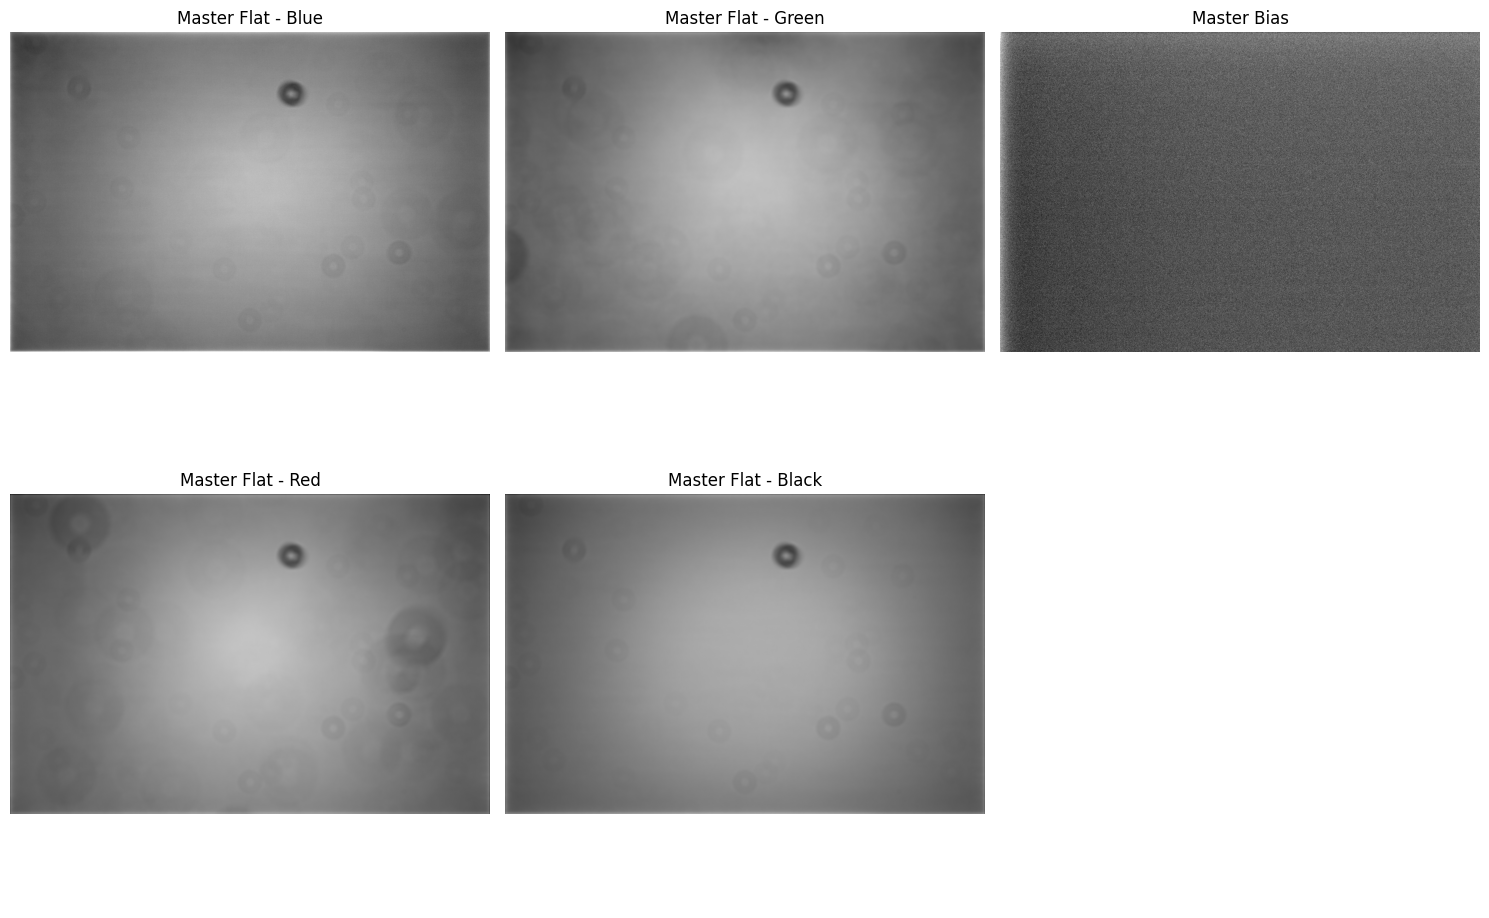

In [13]:
# Load the master flats and master bias
master_flat_blue = fits.getdata("/Users/vitorclara/Documents/Técnico/LA/flats_blue/master_flat_blue.fits")
master_flat_green = fits.getdata("/Users/vitorclara/Documents/Técnico/LA/flats_green/master_flat_green.fits")
master_flat_red = fits.getdata("/Users/vitorclara/Documents/Técnico/LA/flats_red/master_flat_red.fits")
master_flat_black = fits.getdata("/Users/vitorclara/Documents/Técnico/LA/flats_black/master_flat_black.fits")
master_bias = fits.getdata("/Users/vitorclara/Documents/Técnico/LA/bias/master_bias.fits")



# Calculate zscale for master bias
from astropy.visualization import ZScaleInterval
interval = ZScaleInterval()
vmin, vmax = interval.get_limits(master_bias)

fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # Changed to 2x3 to accommodate the master bias

axes[0, 0].imshow(master_flat_blue, origin='lower', cmap='gray', vmin=0.9, vmax=1.1)
axes[0, 0].set_title('Master Flat - Blue')

axes[0, 1].imshow(master_flat_green, origin='lower', cmap='gray', vmin=0.9, vmax=1.1)
axes[0, 1].set_title('Master Flat - Green')

axes[1, 0].imshow(master_flat_red, origin='lower', cmap='gray', vmin=0.9, vmax=1.1)
axes[1, 0].set_title('Master Flat - Red')

axes[1, 1].imshow(master_flat_black, origin='lower', cmap='gray', vmin=0.9, vmax=1.1)
axes[1, 1].set_title('Master Flat - Black')

axes[0, 2].imshow(master_bias, origin='lower', cmap='gray', vmin=vmin, vmax=vmax) # Applied vmin/vmax from zscale
axes[0, 2].set_title('Master Bias')

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()